In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_from_file(filename):
    my_list = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            my_list.append([float(i[1:-1]) for i in row])
    return my_list

In [3]:
def read_rates(filename):
    server_1_rates = []
    server_2_rates = []
    server_3_rates = []
    server_4_rates = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            server_1_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[:88]])
            server_2_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[88:176]])
            server_3_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[176:264]])
            server_4_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[264:]])
    return server_1_rates, server_2_rates, server_3_rates, server_4_rates


def get_mean_rates(rates_from_file):
    server_1_rates, server_2_rates, server_3_rates, server_4_rates = rates_from_file
    mean_server_1_rates = [np.mean(list(rates)) for rates in server_1_rates]
    mean_server_2_rates = [np.mean(list(rates)) for rates in server_2_rates]
    mean_server_3_rates = [np.mean(list(rates)) for rates in server_3_rates]
    mean_server_4_rates = [np.mean(list(rates)) for rates in server_4_rates]
    return mean_server_1_rates, mean_server_2_rates, mean_server_3_rates, mean_server_4_rates

In [4]:
utilities_0 = read_from_file('e0/utilities.csv')
rates_from_file_0 = read_rates('e0/rates.csv')
mean_rates_0 = get_mean_rates(rates_from_file_0)

In [8]:
utilities_01 = read_from_file('e01/utilities.csv')
rates_from_file_01 = read_rates('e01/rates.csv')
mean_rates_01 = get_mean_rates(rates_from_file_01)

In [9]:
utilities_02 = read_from_file('e02/utilities.csv')
rates_from_file_02 = read_rates('e02/rates.csv')
mean_rates_02 = get_mean_rates(rates_from_file_02)

In [10]:
utilities_05 = read_from_file('e05/utilities.csv')
rates_from_file_05 = read_rates('e05/rates.csv')
mean_rates_05 = get_mean_rates(rates_from_file_05)

In [11]:
utilities_1 = read_from_file('e1/utilities.csv')
rates_from_file_1 = read_rates('e1/rates.csv')
mean_rates_1 = get_mean_rates(rates_from_file_1)

In [4]:
num_of_servers = 4

## Hospital parameters
- Rates
  - Ambulance arrival rate: $\lambda_2 = 1$
  - Other arrival rate: $\lambda_1 = 0.5$ 
  - Service rate: $\mu = 0.7$
- Resources:
  - Num of servers: $C = 4$
  - Threshold: $T = 7$
  - System capacity: $N = 10$
  - Buffer capacity: $M = 7$ 


## Team priority

Prioritise the experienced staff first
- [Experienced, Mid-level, Mid-level, Intern]

## Utility functions
Weighted averages of some pairs of the following:
- individuals served
- idle time
- service time/rate
$$
    U_k^1 = e (\text{\# served}) + (1-e) (\text{idle time})
$$
$$
    U_k^2 = e \frac{\text{\# served}}{\text{\# all individuals}} + (1 - e) \frac{\text{current time - busy time}}{\text{current time}}
$$
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$
$$
    U_k^4 = e (\frac{1}{\text{mean service time}_k}) + (1 - e) (\text{idle proportion})_k
$$
$$
    U_k^5 = e \frac{\text{\# served}}{\text{\# all individuals}} + (1 - e) (\text{mean service time})_k
$$
$$
    U_k^6 = e \frac{\text{\# served}}{\text{\# all individuals}} + (1 - e) (\frac{1}{\text{mean service time}_k})
$$

## e = 0
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

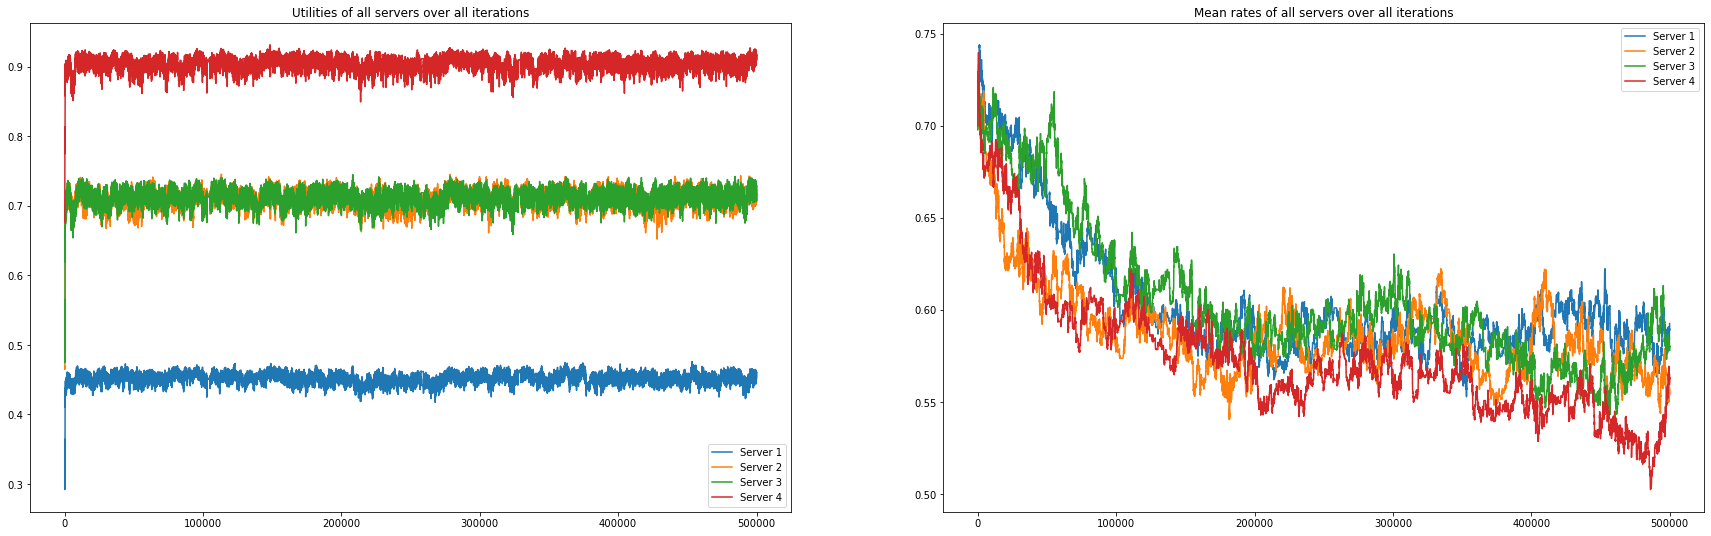

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_0])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_0[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

## e = 0.1
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

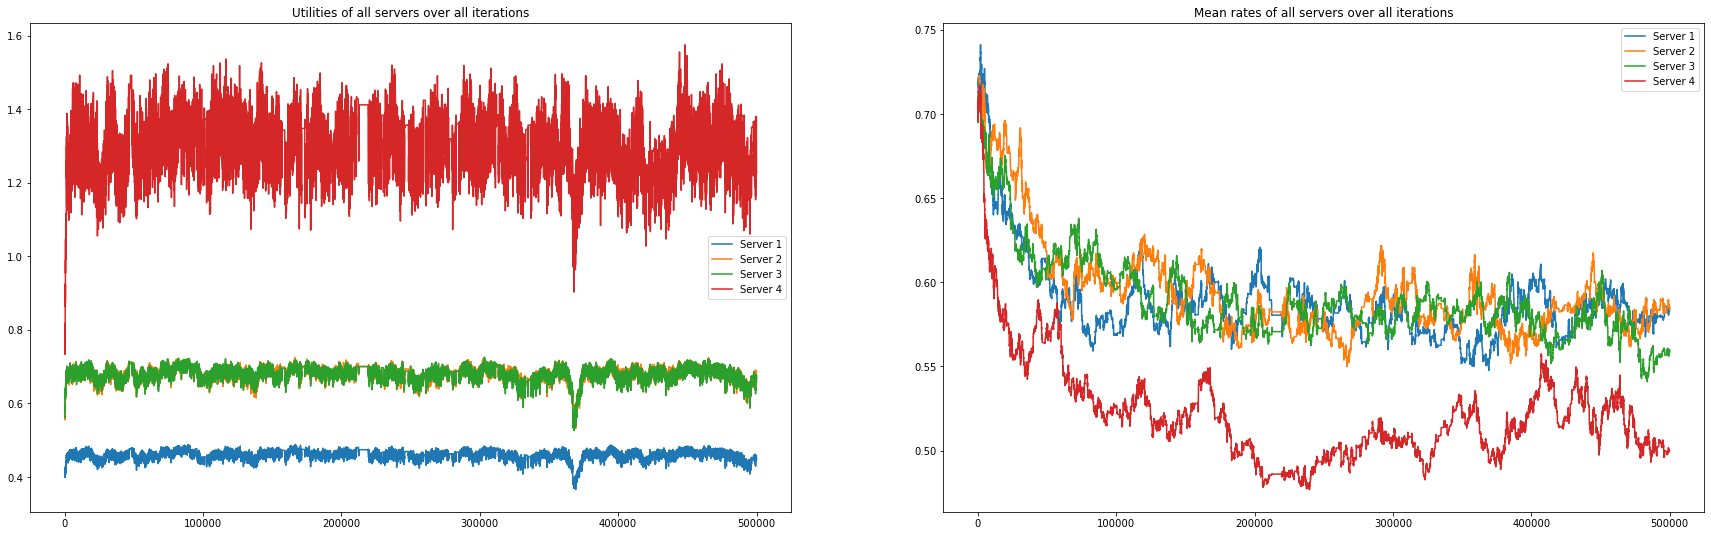

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_01])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_01[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

- Increase runtime

## e = 0.2
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

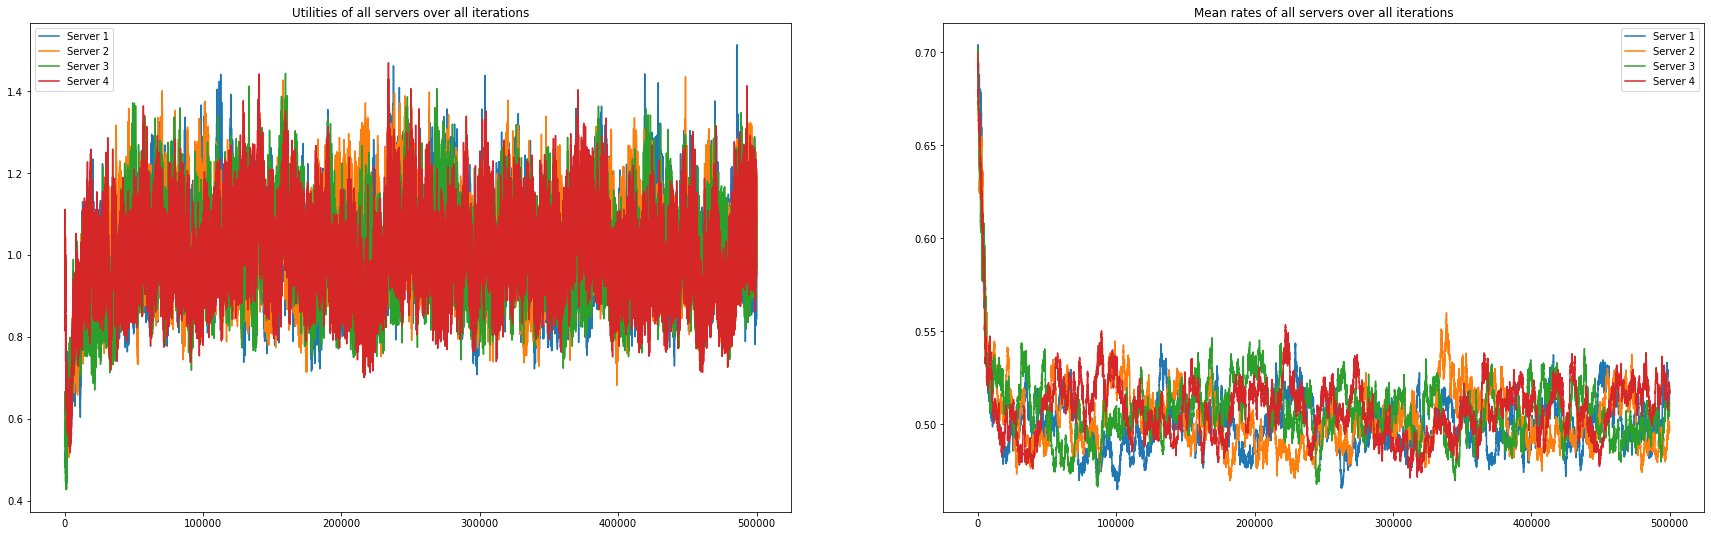

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_02])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_02[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

## e = 0.5
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

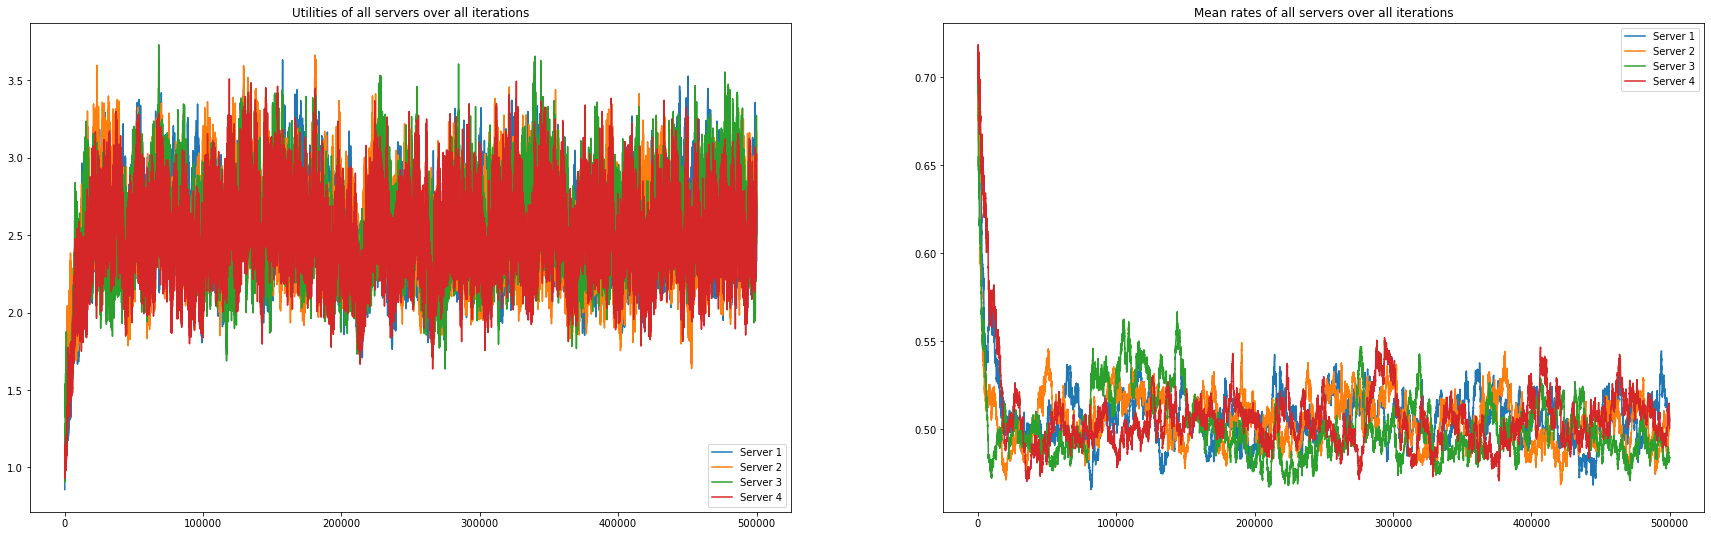

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_05])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_05[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

## e = 1
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

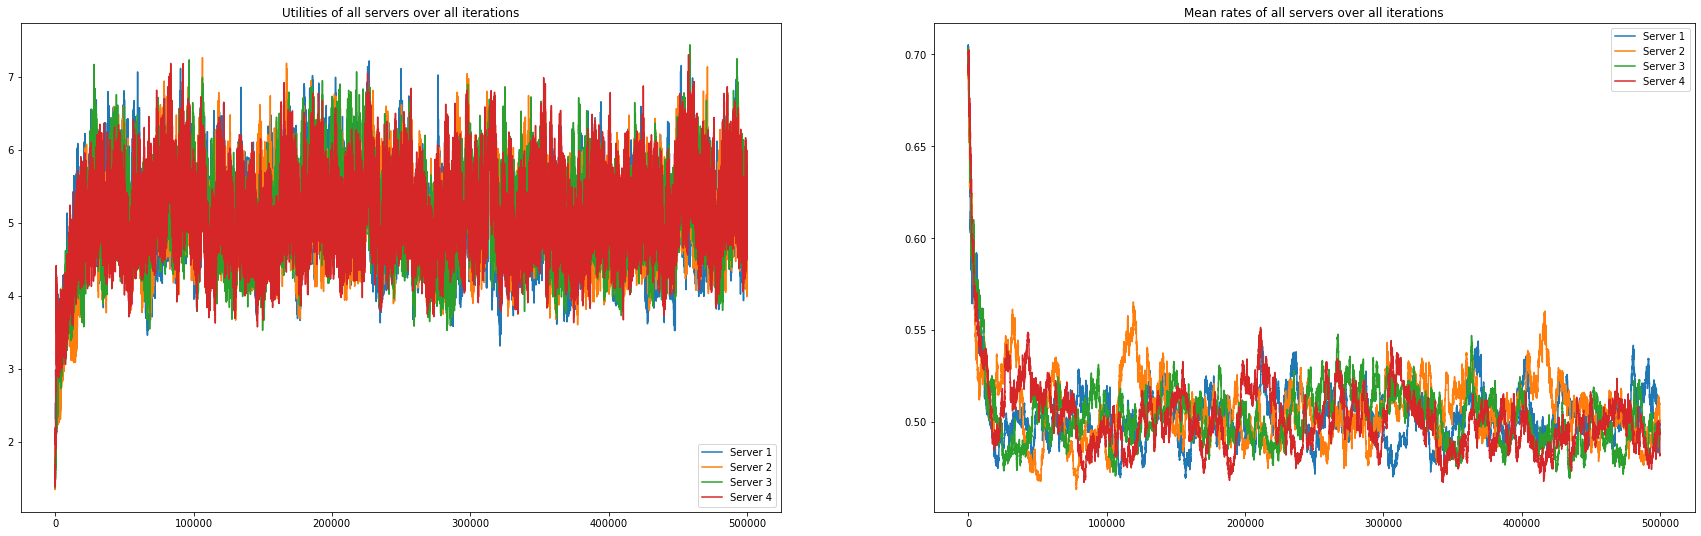

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_1])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_1[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

# Variations:
- Initial service rate (from 0.7 to (0.1, 0.5, 1))
- Arrival rate (from \lambda_2 = 1 to (0.5, 1.5))

# Change initial service rate: e = 0.1

In [5]:
utilities_01_initial_01 = read_from_file('e01_initial_01/utilities.csv')
rates_from_file_01_initial_01 = read_rates('e01_initial_01/rates.csv')
mean_rates_01_initial_01 = get_mean_rates(rates_from_file_01_initial_01)

In [6]:
utilities_01_initial_05 = read_from_file('e01_initial_05/utilities.csv')
rates_from_file_01_initial_05 = read_rates('e01_initial_05/rates.csv')
mean_rates_01_initial_05 = get_mean_rates(rates_from_file_01_initial_05)

In [7]:
utilities_01_initial_1 = read_from_file('e01_initial_1/utilities.csv')
rates_from_file_01_initial_1 = read_rates('e01_initial_1/rates.csv')
mean_rates_01_initial_1 = get_mean_rates(rates_from_file_01_initial_1)

## Initial $\mu = 0.1$ (used to be 0.7)
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

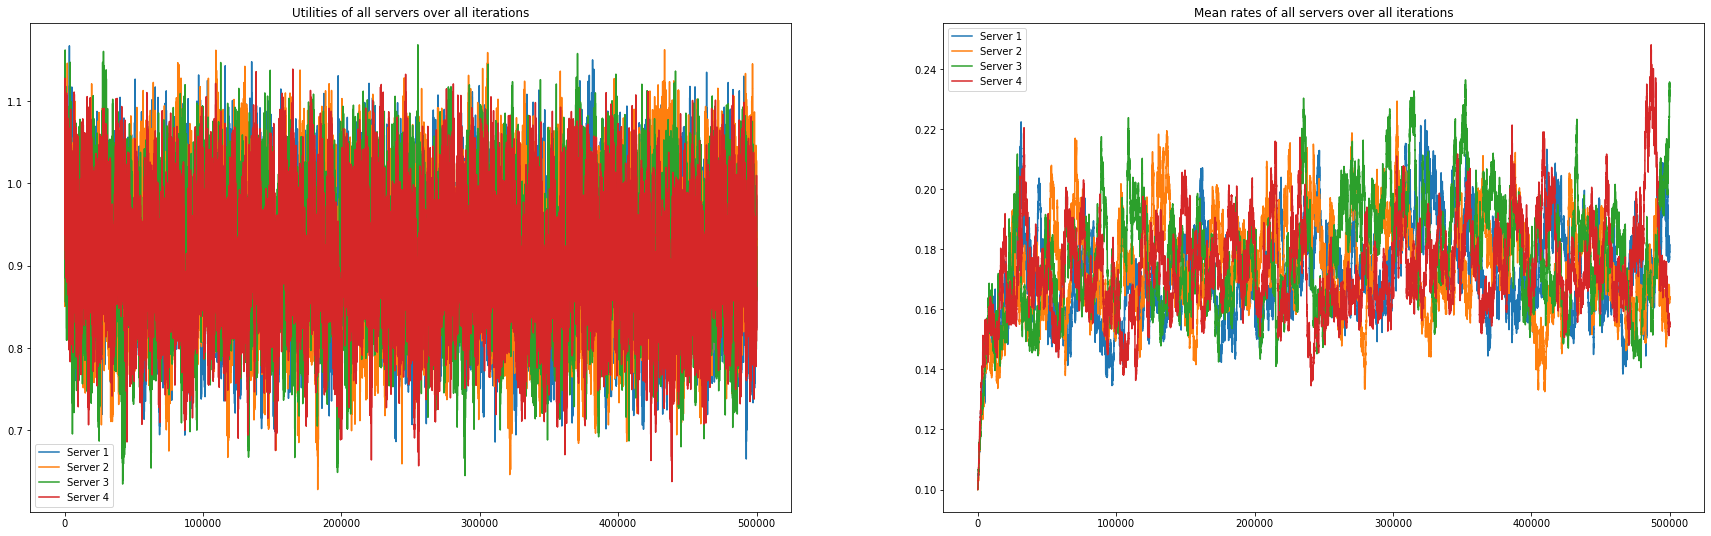

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_01_initial_01])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_01_initial_01[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

- Not entirely sure what's happening
- Possibly: So many lost patients that by either increasing or decreasing rates doesn't make any difference

## Initial $\mu = 0.5$ (used to be 0.7)
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

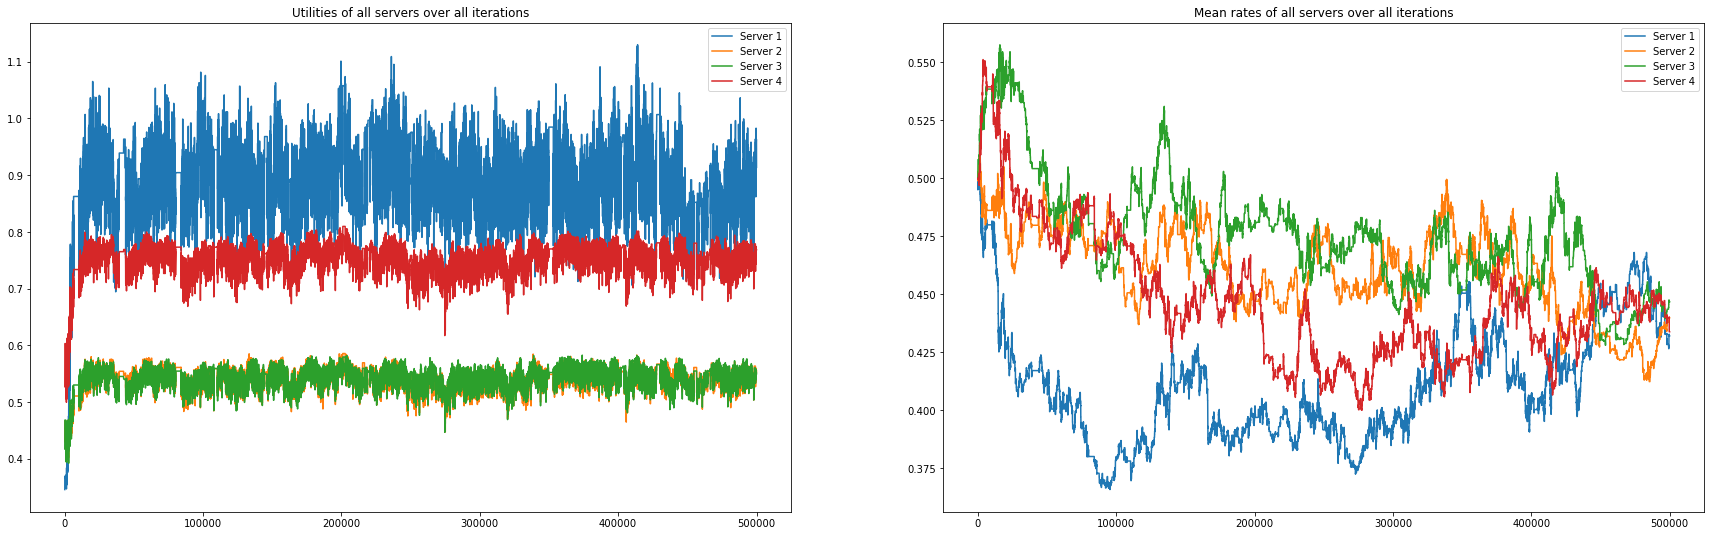

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_01_initial_05])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_01_initial_05[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

- Utilities for servers 2,3,4 are slightly lower from the base case
- Server 1 lowers their mean service rate early on and gets an increased utility
- Run RL algorithm many times?

## Initial $\mu = 1$ (used to be 0.7)
$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

C:\Users\c1400990\anaconda3\envs\AmbulanceGame\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


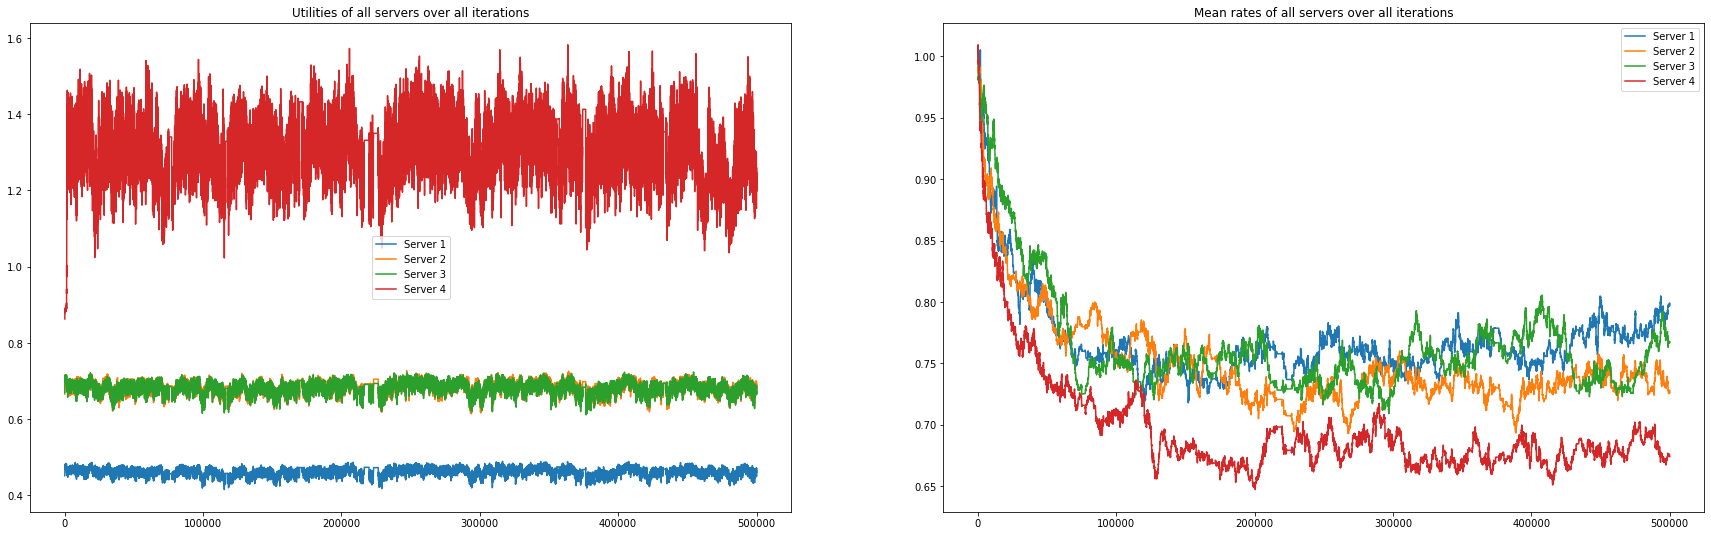

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_01_initial_1])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_01_initial_1[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

- No significant change when increasing initial $\mu$ to 1
- Maybe increse it to 1.5?

# Change arrival rate $\lambda_2$: e = 0.1

In [11]:
utilities_01_decreased_arrival = read_from_file('e01_decreased_arrival/utilities.csv')
rates_from_file_01_decreased_arrival = read_rates('e01_decreased_arrival/rates.csv')
mean_rates_01_decreased_arrival = get_mean_rates(rates_from_file_01_decreased_arrival)

In [12]:
utilities_01_increased_arrival = read_from_file('e01_increased_arrival/utilities.csv')
rates_from_file_01_increased_arrival = read_rates('e01_increased_arrival/rates.csv')
mean_rates_01_increased_arrival = get_mean_rates(rates_from_file_01_increased_arrival)

$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$

## Decrease $\lambda_2 = 0.5$

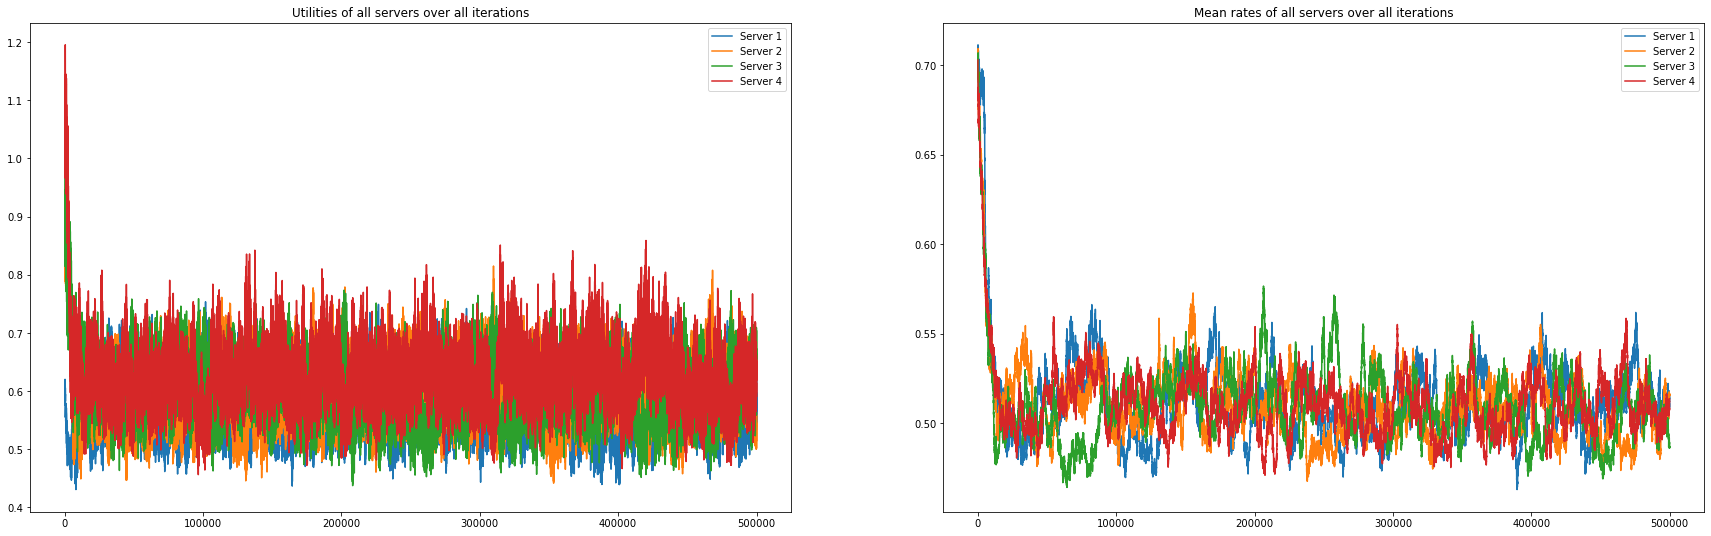

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_01_decreased_arrival])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_01_decreased_arrival[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()

## Increase $\lambda_2 = 1.5$

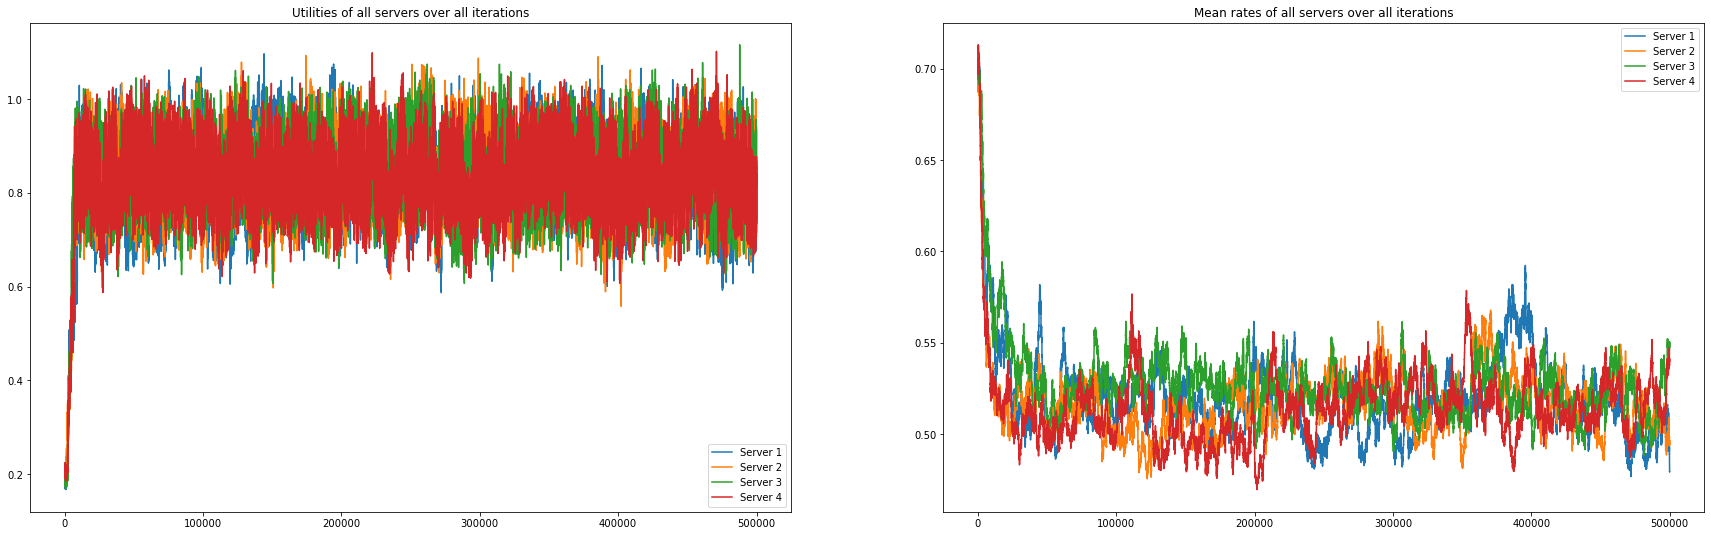

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_01_increased_arrival])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_01_increased_arrival[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()